# Campus Recruitment - Analysis and Prediction

![](https://images.unsplash.com/photo-1541339907198-e08756dedf3f?ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8dW5pdmVyc2l0eXxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&w=1000&q=80)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing the libraries and dataset
5. Data wrangling
    - Gender
    - ssc
    - hsc
    - work experience
    - specialization
    - status
6. Data Visualization
    - Gender vs Placed
    - Scores vs Placed
    - High School stream
    - Salary
7. Prediction Models
    - KNN Classifier
    - Logistic Regression
    - Random Forest Classifier
    - Support Vector Machine Classifier
    - XgBoost Classifier
8. Model Comparison
9. Conclusion

### Abstract
Campus recruitment is a strategy for sourcing, engaging and hiring young talent for internship and entry-level positions. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates. Some industries participate in campus recruiting more than others; finance, technology, business consulting, manufacturing and engineering are a few of the most popular.

### Dataset
The dataset is collected from Kaggle website. Here is the link for the dataset : https://www.kaggle.com/benroshan/factors-affecting-campus-placement?select=Placement_Data_Full_Class.csv

### Goal
The goal of this project is to analyze the factors that can effect the Campus Recruitment, and also creating a model which will predict the chances of getting placed depending on various factors.

### 1.  Importing the relevant libraries and data 

Let us first start with the usual importing of relevant libraries which will be required for our analysis. We shall import the data into the dataframe name df

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df_copy=df.copy()

### 2. Data wrangling

Since the raw data could have lots of missing values or other issues, we will be taking care to align the data into simpler more understandable and clear data which will be further helpful to be used in our ML models. Since the columns have not been clearly mentioned as to what they exactly mean, I have made the following assumptions to understand the data better:

* 'ssc_p': 10th Grade percentage
* 'ssc_b':10th Grade board 
* 'hsc_p': 12th Grade percentage 
* 'hsc_b': 12th Grade board 
* 'hsc_s': Higher secondary stream
* 'degree_p': Undergraduate percentage 
* 'degree_t': Undergraduate degree type  
* 'workex': Work experience  
* 'etest_p':Placement test percentage 
* 'specialisation': MBA specialisation 
* 'mba_p': MBA percentage
* 'status': Hiring status 

In [4]:
df['sl_no'].unique().size

215

The data give to us has a total of 215 entries. This is roughly the size of a MBA batch for a particular year of a college. Hence, the data provided could be that for the batch of a particular year.

Let us check the various data types available to us and see if there are any missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### Salary

As we can clearly see, the only missing values present are in the salary column. This is because the missing values are corresponding to students to did not get placed in the placement program. 

We will make the assumption that the missing values are filled with 0.

In [6]:
df['salary'].fillna(0,inplace=True)
df['salary'].isna().any()

False

In [7]:
df_copy['salary'].median()

265000.0

So, we have replaced all the missing values with the median value of Rs. 2,65,000

### Gender

Gender column is straightforward with either Male (M) or Female (F) indices.
Since we cannot leave the data in object form, let us replace 

**M with 0** and **F with 1** .

In [8]:
df['gender']=df['gender'].map({'M':0,'F':1})

In [9]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### ssc_b and hsc_b

Here, we are presented with the data of the 10th board. Let us check the unique entries and their counts we are presented with.

In [10]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

As we can observe, the unique entries are either Central or others. By Central, the indication must be that the board is CBSE. While others could mean variety of boards such as state board, international board or ICSC board. The candidates with central board is slightly higher as compared to other boards. 

We shall perform the exact same treatment as we did for gender.

**Central : 1
Others : 0**

In [11]:
df['ssc_b']=df['ssc_b'].map({'Central':1,'Others':0})

In [12]:
df['hsc_b']=df['hsc_b'].map({'Central':1,'Others':0})

### hsc_s

This column deals with the specialisation subjects taken by students when they enter 11th grade. Let us see the various entries alongwith their counts.

In [13]:
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

As can be seen, students with commerce specialisation was highest followed by science and arts.

We shall use one-hot-encoding for this particular feature. This can be done using the pd.get_dummies function.

In [14]:
df_subjects=pd.get_dummies(df['hsc_s'])
df=df.merge(df_subjects,on=df['sl_no'])
df_subjects

,Arts,Commerce,Science
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
210,0,1,0
211,0,0,1
212,0,1,0
213,0,1,0


In [15]:
df.drop('key_0',axis=1,inplace=True)
df.drop('hsc_s',axis=1,inplace=True)

In [16]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary', 'Arts', 'Commerce', 'Science'],
      dtype='object')

In [17]:
df=df[['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'Arts', 'Commerce','Science','degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary']]

### degree_t

Let us check the various types of Undergrad degrees available in the data.

In [18]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

As we can see, most students had their undergraduate degrees in commerce and management followed by science and then others. Just as we did for higher secondary subjects, we shall one hot encode the results of undergrad degrees aswell.

In [19]:
df_deg=pd.get_dummies(df['degree_t'])
df=df.merge(df_deg,on=df.index)

In [20]:
df.drop('key_0',axis=1,inplace=True)
df.drop('degree_t',axis=1,inplace=True)

In [21]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'Arts',
       'Commerce', 'Science', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status', 'salary', 'Comm&Mgmt', 'Others',
       'Sci&Tech'],
      dtype='object')

In [22]:
df=df[['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'Arts',
       'Commerce', 'Science', 'degree_p','Comm&Mgmt', 'Others',
       'Sci&Tech','workex', 'etest_p',
       'specialisation', 'mba_p', 'status', 'salary']]

In [23]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,Arts,Commerce,Science,degree_p,Comm&Mgmt,Others,Sci&Tech,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,1,0,58.00,0,0,1,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,1,78.33,0,0,0,1,77.48,0,0,1,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,1,68.00,1,1,0,0,64.00,1,0,0,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,1,52.00,1,0,0,1,52.00,0,0,1,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,1,73.60,1,0,1,0,73.30,1,0,0,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,0,82.00,0,0,1,0,77.60,1,0,0,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,0,60.00,0,0,0,1,72.00,0,0,1,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,0,67.00,0,0,1,0,73.00,1,0,0,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,0,66.00,0,0,1,0,58.00,1,0,0,No,70.0,Mkt&HR,60.23,Placed,204000.0


### workex

This column tells us if a student has any work experience prior to joining the MBA programme.

We shall map the entries as

**Yes:1
No:0**

In [24]:
df['workex']=df['workex'].map({'Yes':1,'No':0})
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,Arts,Commerce,Science,degree_p,Comm&Mgmt,Others,Sci&Tech,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,1,0,58.00,0,0,1,0,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,1,78.33,0,0,0,1,77.48,0,0,1,1,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,1,68.00,1,1,0,0,64.00,1,0,0,0,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,1,52.00,1,0,0,1,52.00,0,0,1,0,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,1,73.60,1,0,1,0,73.30,1,0,0,0,96.8,Mkt&Fin,55.50,Placed,425000.0


### specialisation

This column tells us about the type of MBA program the student is currently enrolled in. The value counts for each specialisation are as follows.

In [25]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Hence, majority of the students were in Marketing and Finance while the remaining in Marketing and HR.

We should encode the data as 

**Mkt&Fin : 1
Mkt&HR : 0**

In [26]:
df['specialisation']=df['specialisation'].map({'Mkt&Fin':1,'Mkt&HR':0})

### status

This column tells us whether the student got placed in the placement program. This is our target variable which is important for training and testing purpose in the ML phase.

Let us map the terms placed and unplaced as 

**Placed : 1
Not Placed : 0**

In [27]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [28]:
df['status']=df['status'].map({'Placed':1,'Not Placed':0})

Now, we can consider the data to be cleaned completely off any issues and can be safely used for visualisation and machine learning purposes. Let us take a peek at how the final dataframe looks like.

In [29]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,Arts,Commerce,Science,degree_p,Comm&Mgmt,Others,Sci&Tech,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,1,0,58.00,0,0,1,0,55.0,0,58.80,1,270000.0
1,2,0,79.33,1,78.33,0,0,0,1,77.48,0,0,1,1,86.5,1,66.28,1,200000.0
2,3,0,65.00,1,68.00,1,1,0,0,64.00,1,0,0,0,75.0,1,57.80,1,250000.0
3,4,0,56.00,1,52.00,1,0,0,1,52.00,0,0,1,0,66.0,0,59.43,0,0.0
4,5,0,85.80,1,73.60,1,0,1,0,73.30,1,0,0,0,96.8,1,55.50,1,425000.0


### ssc_p , hsc_p,degree_p, mba_p, etest_p
In order to align the percentage values better,we will be sectioning the percentages into 3 main categories based upon percentage ranges. These ranges are as follows:

0-60 % : 3

61-80 % : 2

81-100 % :1

In [30]:

df.loc[df['ssc_p']<=60,'ssc_p_c']=3
df.loc[(df['ssc_p']>60) & (df['ssc_p']<81),'ssc_p_c']=2
df.loc[(df['ssc_p']>80)& (df['ssc_p']<101),'ssc_p_c']=1

df.loc[df['hsc_p']<=60,'hsc_p_c']=3
df.loc[(df['hsc_p']>60) & (df['hsc_p']<81),'hsc_p_c']=2
df.loc[(df['hsc_p']>80)& (df['hsc_p']<101),'hsc_p_c']=1


df.loc[df['degree_p']<=60,'degree_p_c']=3
df.loc[(df['degree_p']>60) & (df['degree_p']<81),'degree_p_c']=2
df.loc[(df['degree_p']>80)& (df['degree_p']<101),'degree_p_c']=1

df.loc[df['mba_p']<=60,'mba_p_c']=3
df.loc[(df['mba_p']>60) & (df['mba_p']<81),'mba_p_c']=2
df.loc[(df['mba_p']>80)& (df['mba_p']<101),'mba_p_c']=1

df.loc[df['etest_p']<=60,'etest_p_c']=3
df.loc[(df['etest_p']>60) & (df['etest_p']<81),'etest_p_c']=2
df.loc[(df['etest_p']>80)& (df['etest_p']<101),'etest_p_c']=1



qual_type=['ssc_p','hsc_p','degree_p','mba_p','etest_p']

for qual in qual_type:
    df.drop(qual,axis=1,inplace=True)




In [31]:
df.columns

Index(['sl_no', 'gender', 'ssc_b', 'hsc_b', 'Arts', 'Commerce', 'Science',
       'Comm&Mgmt', 'Others', 'Sci&Tech', 'workex', 'specialisation', 'status',
       'salary', 'ssc_p_c', 'hsc_p_c', 'degree_p_c', 'mba_p_c', 'etest_p_c'],
      dtype='object')

In [32]:
df=df[['sl_no', 'gender', 'ssc_b', 'hsc_b','ssc_p_c', 'hsc_p_c', 'degree_p_c', 'mba_p_c', 'etest_p_c', 'Arts', 'Commerce', 'Science',
       'Comm&Mgmt', 'Others', 'Sci&Tech', 'workex', 'specialisation', 'status',
       'salary']]

Now, the dataframe has been wrangled and can be used for the purpose of ML and data visualisation aswell. Let us look at how the dataframe looks like.

In [33]:
df.head()

,sl_no,gender,ssc_b,hsc_b,ssc_p_c,hsc_p_c,degree_p_c,mba_p_c,etest_p_c,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,workex,specialisation,status,salary
0,1,0,0,0,2.0,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,270000.0
1,2,0,1,0,2.0,2.0,2.0,2.0,1.0,0,0,1,0,0,1,1,1,1,200000.0
2,3,0,1,1,2.0,2.0,2.0,3.0,2.0,1,0,0,1,0,0,0,1,1,250000.0
3,4,0,1,1,3.0,3.0,3.0,3.0,2.0,0,0,1,0,0,1,0,0,0,0.0
4,5,0,1,1,1.0,2.0,2.0,3.0,1.0,0,1,0,1,0,0,0,1,1,425000.0


## 3. Data Visualisation

In this section, we shall be visualising the various features to understand if they'll have some correlation with the target feature.

### Gender Vs Placed

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


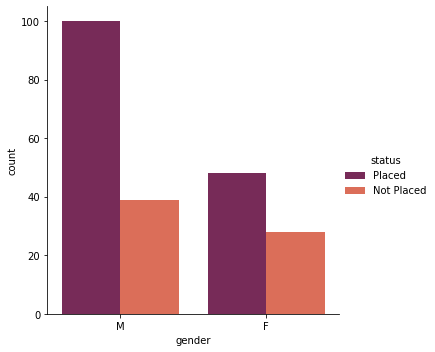

In [34]:
sns.catplot('gender',data=df_copy,kind='count',hue='status',palette='rocket')

As it can be seen, high percentage of male candidates got placed. On the other hand, comparitively lower number of female candidates got placed. This is expected as male candidates are generally higher in most brances. Hence, their chances of getting placed is normally higher as well. Let us check the male to female ratio of this branch.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'M/F ratio=1.83')

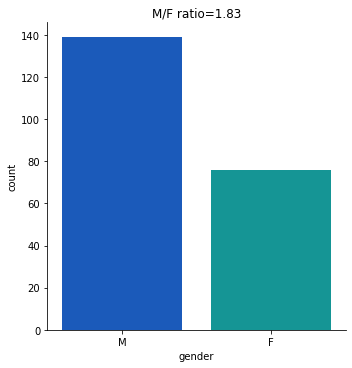

In [35]:
sns.factorplot('gender',data=df_copy,kind='count',palette='winter')
plt.title('M/F ratio={0:.2f}'.format(df_copy['gender'].value_counts()[0]/df_copy['gender'].value_counts()[1]))

The M/F ratio is approximately 2. This can be interpreted as for every 1 female candiate, there are 2 male candiates sitting for placements.


Let us check the placement percentage for each batch to understand if gender does imply better placement conversion.

In [36]:
df_male=df_copy[df_copy['gender']=='M']

In [37]:
df_male['status'].value_counts()

Placed        100
Not Placed     39
Name: status, dtype: int64

In [38]:
male_placed_ratio=df_male['status'].value_counts()[0]/df_male['status'].value_counts()[1]

In [39]:
print('Placement ratio of male candidates:{0:.2f}'.format(male_placed_ratio))

Placement ratio of male candidates:2.56


In [40]:
df_female=df_copy[df_copy['gender']=='F']
df_female['status'].value_counts()

Placed        48
Not Placed    28
Name: status, dtype: int64

In [41]:
female_placed_ratio=df_female['status'].value_counts()[0]/df_female['status'].value_counts()[1]
print('Placement ratio of female candidates:{0:.2f}'.format(female_placed_ratio))

Placement ratio of female candidates:1.71


Here it can be seen from the placement ratios of the two genders that **males outperformed the female candidates in the batch**.

### Scores Vs Placed

Let us see what is the correlation between 10th percentage of each category and placement status

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 6.79999999999999, '10th percentage class')

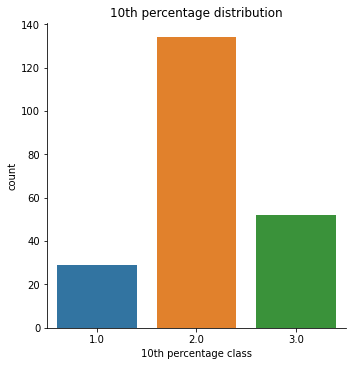

In [42]:
sns.catplot('ssc_p_c',data=df,kind='count')
plt.title('10th percentage distribution')
plt.xlabel('10th percentage class')

As we can see, maximum students fall in the range of 61-80 % followed by 0-50% and then 80-100%. Let us see how the placement status changes with the percentage range.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 20.80000000000002, '10th Percentage class')

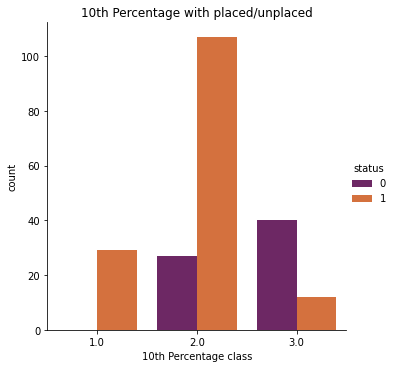

In [43]:
sns.catplot('ssc_p_c',data=df,kind='count',hue='status',palette='inferno')
plt.title('10th Percentage with placed/unplaced')
plt.xlabel('10th Percentage class')

As can be seen, all students scoring 80-100% in 10th grade got placed. Most students in 60-80% range did get placed while maximum students below 60% in 10th standard couldn't get placed. It shows that generally, a student who has done well in 10th grade is more likely to get placed.

Let us study the same for the remaining score percentages such as 12th, UG score, MBA score and E-test score.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 6.79999999999999, '12th Percentage class')

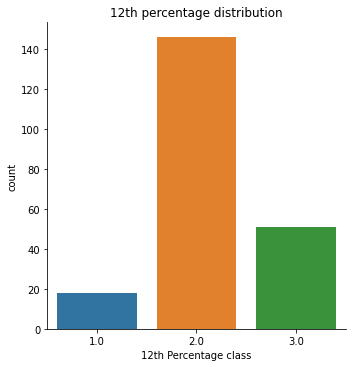

In [44]:
sns.catplot('hsc_p_c',data=df,kind='count')
plt.title('12th percentage distribution')
plt.xlabel('12th Percentage class')

Very few students are in the 80-100 % bracket in 12th board exams. Like 10th grade, most students were in the 60-80 % range, followed by 0-60 % range.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 21.706249999999983, '12th Percentage class')

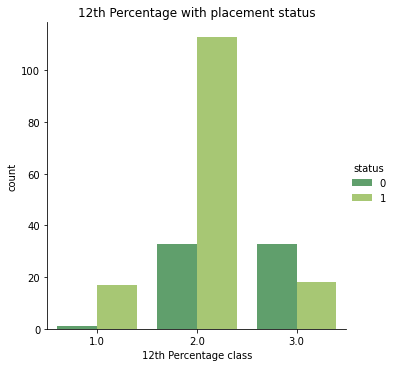

In [45]:
sns.catplot('hsc_p_c',data=df,kind='count',hue='status',palette='summer')
plt.title('12th Percentage with placement status')
plt.xlabel('12th Percentage class')

The graph is quite similar to what was seen for 10th board exams. Almost entire students with 80-100 % got placed. Most students in 60-80 % range also got placed. Just like in the case of 10th boards, most students could not get placed in the 0-60 % range.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 24.0, 'UG percentage class')

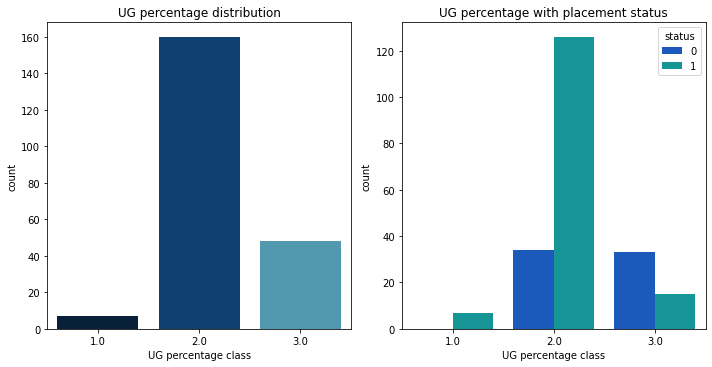

In [46]:
fig=plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)

g = sns.countplot("degree_p_c" , data=df, ax=ax1,palette='ocean')

ax2=fig.add_subplot(122)

g=sns.countplot('degree_p_c',data=df,ax=ax2,hue='status',palette='winter')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('UG percentage distribution')
ax1.set_xlabel('UG percentage class')
ax2.set_title('UG percentage with placement status')
ax2.set_xlabel('UG percentage class')

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 24.0, 'MBA percentage class')

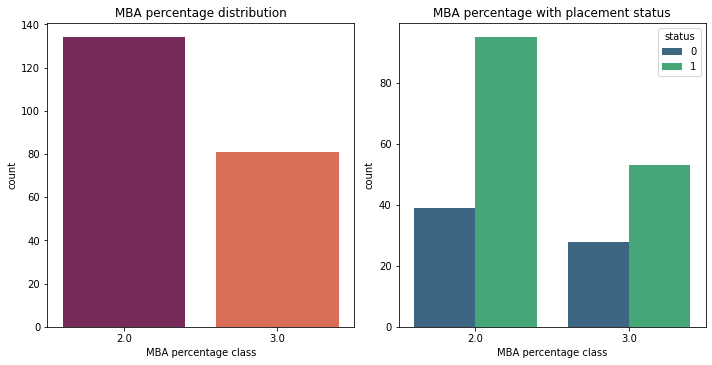

In [47]:
fig1=plt.figure(figsize=(10,5))

ax1 = fig1.add_subplot(121)

g = sns.countplot("mba_p_c" , data=df, ax=ax1,palette='rocket')

ax2=fig1.add_subplot(122)

g=sns.countplot('mba_p_c',data=df,ax=ax2,hue='status',palette='viridis')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('MBA percentage distribution')
ax1.set_xlabel('MBA percentage class')
ax2.set_title('MBA percentage with placement status')
ax2.set_xlabel('MBA percentage class')

On studying the MBA percentage data, we can see that no students crossed the 80% threshold. Hence, the data for class 1 is not available for MBA percentage. 

Upon studying the MBA percentage data, we can see that more students from percentage class 2 got placed as opposed to class 3. However, the difference is not as high as for board and UG percentages. Hence, we can say that MBA percentage is not as big as a factor. This could be because MBA is a branch that places much more importance on speaking skills, internships, case studies, etc rather than academic scores. Hence, the play is much more level fielded in this case. 

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 24.0, 'E test precentage class')

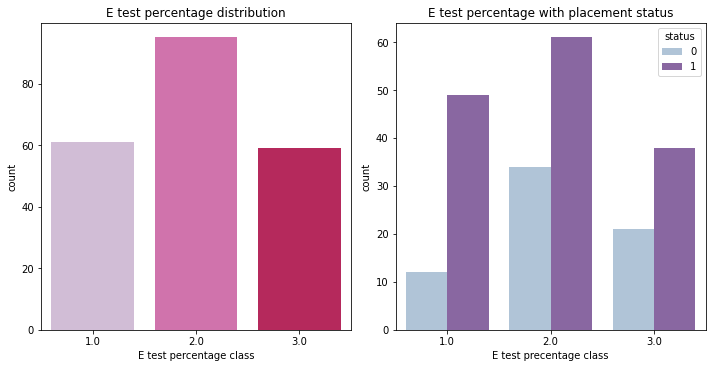

In [48]:
fig2=plt.figure(figsize=(10,5))

ax1 = fig2.add_subplot(121)

g = sns.countplot("etest_p_c" , data=df, ax=ax1,palette='PuRd')

ax2=fig2.add_subplot(122)

g=sns.countplot('etest_p_c',data=df,ax=ax2,hue='status',palette='BuPu')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('E test percentage distribution')
ax1.set_xlabel('E test percentage class')
ax2.set_title('E test percentage with placement status')
ax2.set_xlabel('E test precentage class')

The above graphs tell us about how the students have performed in the E-tests and what value of those have converted their offers.

Most students in the class 1 category have successfully received offers from the company. It is also encouraging to see that more students in class 3 categories have also successfully converted offers.

The reason could be because E-tests are just preliminary screening tests. These tests usually don't hold much value once the student passes the test and moves ahead with further screening process that could include group discussions and interviews.


### High school stream and degree specialisations

We are now interested to check if high school stream, UG degree specialisation or MBA degree specialisation has any particular importance with respect to placement status.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 24.0, 'HS specialisation')

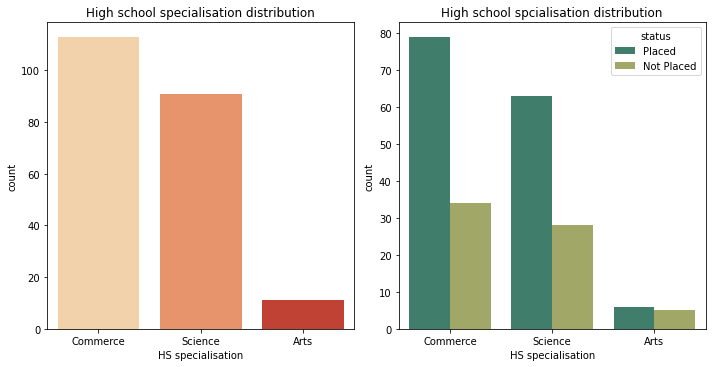

In [49]:
fig3=plt.figure(figsize=(10,5))

ax1 = fig3.add_subplot(121)

g = sns.countplot("hsc_s", data=df_copy, ax=ax1,palette='OrRd')

ax2=fig3.add_subplot(122)

g=sns.countplot('hsc_s',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('High school specialisation distribution')
ax1.set_xlabel('HS specialisation')
ax2.set_title('High school spcialisation distribution')
ax2.set_xlabel('HS specialisation')

As we can see, maximum students enrolled in the program were either from commerce or science background. Very few students were from Arts background.

In terms of placements, it can be seen that most students who got placed were from commerce background followed by science and then arts. This could be because both commerce and arts have great usage of mathematica and analytical skills which are quite important in finance operations. Since commerce students have economics and finance as a part of their school and UG studies, hence they are of high demand by the companies. Arts students will be a bigger asset for Human Resources department of companies as their skillsets are ideal for HR related work. Hence, students getting placed with arts background are demanded mostly for HR related roles.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 24.0, 'MBA specialisation')

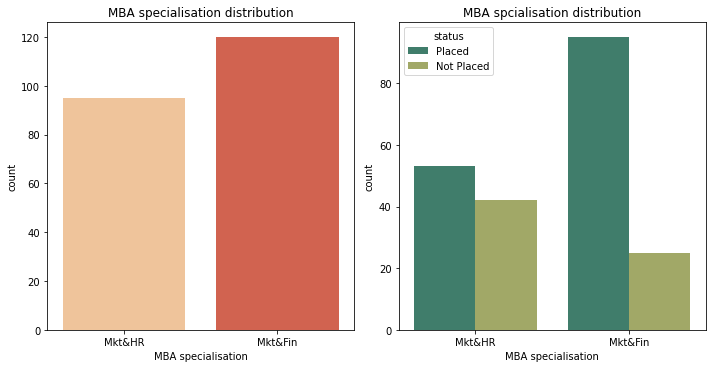

In [50]:
fig4=plt.figure(figsize=(10,5))

ax1 = fig4.add_subplot(121)

g = sns.countplot("specialisation" , data=df_copy, ax=ax1,palette='OrRd')

ax2=fig4.add_subplot(122)

g=sns.countplot('specialisation',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('MBA specialisation distribution')
ax1.set_xlabel('MBA specialisation')
ax2.set_title('MBA spcialisation distribution')
ax2.set_xlabel('MBA specialisation')

From the MBA specialisation data, it can be seen most students who were placed were in Marketing & Finance division. In Marketing & HR section, students couldn't convert as many placement opprotunities. Number of placed and unplaced students are about the same in this case.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 24.0, 'UG specialisation')

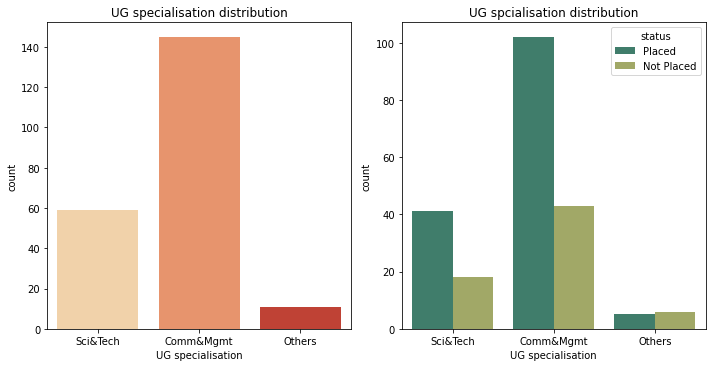

In [51]:
fig5=plt.figure(figsize=(10,5))

ax1 = fig5.add_subplot(121)

g = sns.countplot("degree_t" , data=df_copy, ax=ax1,palette='OrRd')

ax2=fig5.add_subplot(122)

g=sns.countplot('degree_t',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('UG specialisation distribution')
ax1.set_xlabel('UG specialisation')
ax2.set_title('UG spcialisation distribution')
ax2.set_xlabel('UG specialisation')

As expected, most of the commerce students were successful in getting placed followed by science and others.

### SSC and HSC board

Let us visualise the data for the boards of candidates who managed to get placed. This will give us an indication if board of examination has any role to play for placements.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 24.0, 'Students')

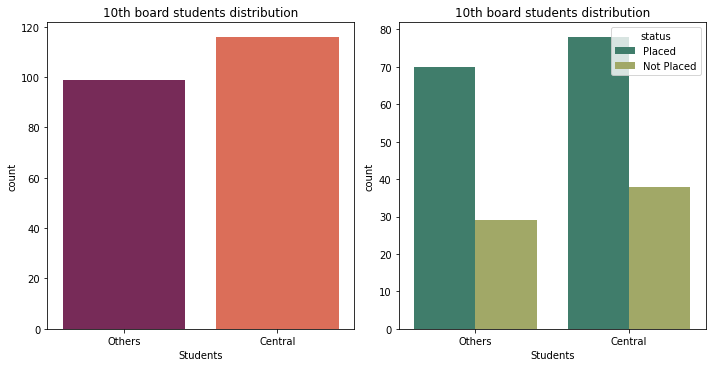

In [52]:
fig6=plt.figure(figsize=(10,5))

ax1 = fig6.add_subplot(121)

g = sns.countplot("ssc_b" , data=df_copy, ax=ax1,palette='rocket')

ax2=fig6.add_subplot(122)

g=sns.countplot('ssc_b',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('10th board students distribution')
ax1.set_xlabel('Students')
ax2.set_title('10th board students distribution')
ax2.set_xlabel('Students')

The placement ratio for each of the boards is similar. Hence, we could say that 10th board of examination doesn't hold much value towards placement.

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 24.0, 'Students')

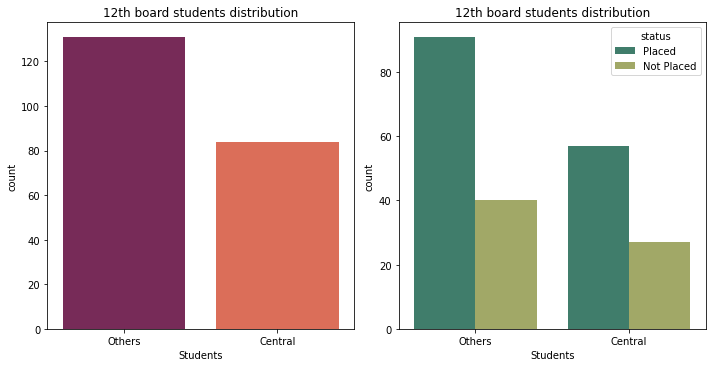

In [53]:
fig7=plt.figure(figsize=(10,5))

ax1 = fig7.add_subplot(121)

g = sns.countplot("hsc_b" , data=df_copy, ax=ax1,palette='rocket')

ax2=fig7.add_subplot(122)

g=sns.countplot('hsc_b',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('12th board students distribution')
ax1.set_xlabel('Students')
ax2.set_title('12th board students distribution')
ax2.set_xlabel('Students')

Unlike the case for 10th board, more students opted for state boards in their 12th examinations. The performance of state board students was better as more students from state board of 12th were placed. However, the placed/unplaced ratio for both is nearly identical once again. Hence, 12th board is not playing a significant role once again.

### Salary distribution

Let us check how the companies are paying their freshers. We shall find the required median and mean salary of the college placements.

Text(0.5, 1.0, 'Salary distribution for the batch')

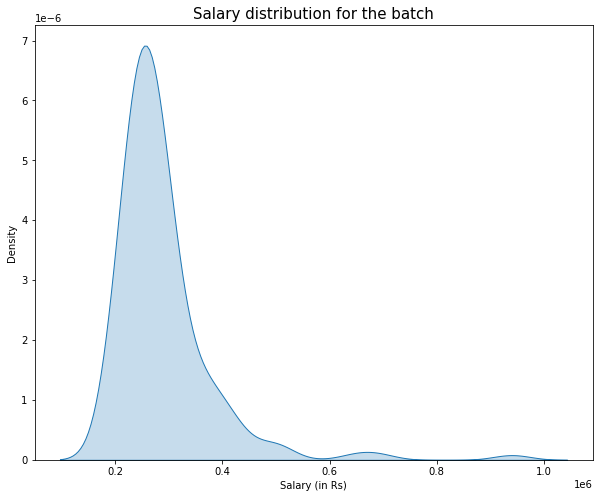

In [54]:
plt.figure(figsize=(10,8))
df_placed=df[df['salary']>0]
sns.kdeplot(df_placed['salary'],shade=True)
plt.xlabel('Salary (in Rs)',size=10)
plt.title('Salary distribution for the batch',size=15)

As we can see, the salary curve is right skewed. This is because there will always be some dream jobs which will offer high packages. However, these packages are very few in number. Majority of the packages will be in the region of 2-4 LPA.

Let us mark the mean and median salaries on the distribution curve to understand what the maximum students are earning.

In [55]:
mean=df_copy['salary'].mean()
median=df_copy['salary'].median()

C:\Users\Shashank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Mean=288655.41   Median=265000.00')

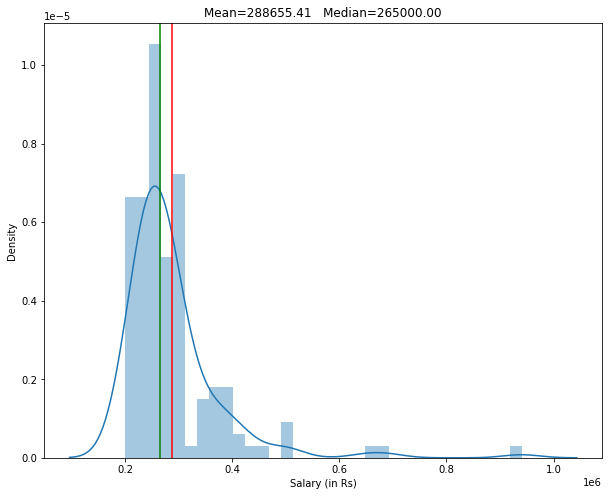

In [56]:
plt.figure(figsize=(10,8))
df_placed=df[df['salary']>0]
sns.distplot(df_placed['salary'])
plt.xlabel('Salary (in Rs)',size=10)
plt.title('Salary distribution for the batch',size=15)
plt.axvline(mean,color='red')
plt.axvline(median,color='green')
plt.title('Mean={0:.2f}   Median={1:.2f}'.format(mean,median))


The green line shows the median salary of the candidates while the red line shows the mean salary.

# 4. Prediction Models
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

Here after visualizing the dataset I have decided to go with these models -
* **KNN algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
 

* **XgBoost Classifier Algortihm** : XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.

Let's deploy the models!!

Now, as we have done all the required visualisations and data wrangling/cleaning operations, we shall focus on applying numerous ML algorithms to see if we can predict the placement status of a student accurately.

### Check for feature correlations

In order to understand how strong are the features correlated to each other, let us create a heatmap of the corrplot that will let us know where the correlations are strong. From the heatmap, we can make strong arguments to remove some of the unimportant features that can be removed for our ML training and testing.

In [57]:
corr=df.corr()

<AxesSubplot:>

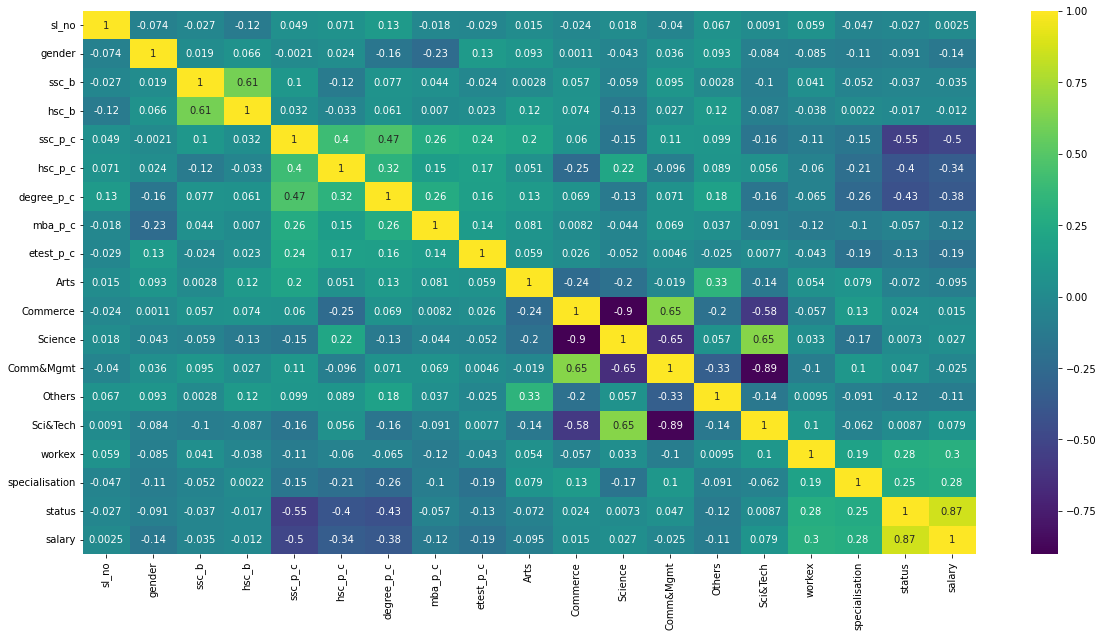

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='viridis')

From the heatmap, it is not entirely certain which of the values are highly correlated. However, there are some bad correlations that we may omit out. But the bigger issue is that there is no clear value that can tell us which are the non important features. Hence, we will leave out these features. However, we can definitely remove some features such as examination boards since they don't seem to give us any extra information.

Let us proceed with dropping the unnecessary features.

In [59]:
unn_feat=['sl_no','ssc_b','hsc_b','salary']

for feat in unn_feat:
    df.drop(feat,axis=1,inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21520\3481729025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(feat,axis=1,inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21520\3481729025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(feat,axis=1,inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21520\3481729025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [60]:
df.head()

,gender,ssc_p_c,hsc_p_c,degree_p_c,mba_p_c,etest_p_c,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,workex,specialisation,status
0,0,2.0,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1
1,0,2.0,2.0,2.0,2.0,1.0,0,0,1,0,0,1,1,1,1
2,0,2.0,2.0,2.0,3.0,2.0,1,0,0,1,0,0,0,1,1
3,0,3.0,3.0,3.0,3.0,2.0,0,0,1,0,0,1,0,0,0
4,0,1.0,2.0,2.0,3.0,1.0,0,1,0,1,0,0,0,1,1


In [61]:
df.isna().any()

gender            False
ssc_p_c           False
hsc_p_c           False
degree_p_c        False
mba_p_c           False
etest_p_c         False
Arts              False
Commerce          False
Science           False
Comm&Mgmt         False
Others            False
Sci&Tech          False
workex            False
specialisation    False
status            False
dtype: bool

### Splitting the data into train and test data
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [62]:
from sklearn.model_selection import train_test_split

Y=df['status'] #Labels
X=df.drop('status',axis=1) #Input data

Since we have very limited data for usage, let us split the data into train/test with a ratio of 0.2

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0,shuffle=True)

### KNN Classifier
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

Let us check for the optimum value of K neighbots required for prediction

In [65]:
k=[5,6,7,8,9,10,11,12,13,14,15]
scores=[]
for val in k:
    knn=KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_train,y_train))
scores    

[0.8733333333333333,
 0.86,
 0.8533333333333334,
 0.8666666666666667,
 0.8533333333333334,
 0.8533333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8533333333333334,
 0.84,
 0.8333333333333334]

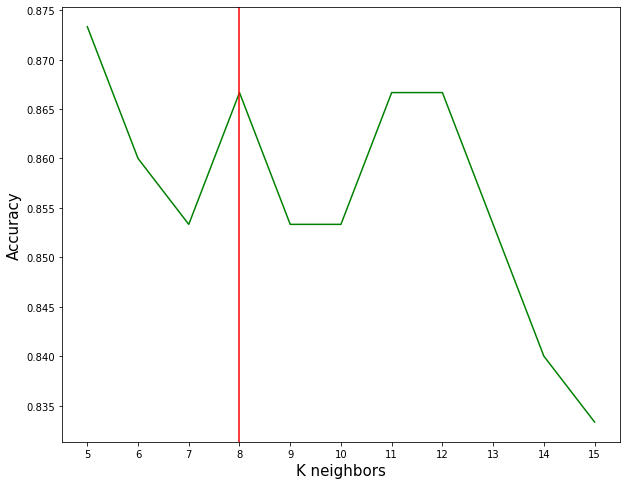

In [66]:
plt.figure(figsize=(10,8))
plt.plot(k,scores,color='green')
plt.xlabel('K neighbors',size=15)
plt.ylabel('Accuracy',size=15)
plt.xticks(np.arange(5,16))
plt.axvline(8,color='red')


As we can see, K=8 is performing quite well on the training data. Increasing the K value to be too high generally leads to underfitted model. 

In [67]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [68]:
y_pred_knn=knn.predict(X_test)

In [69]:
knn.score(X_test,y_test)

0.7846153846153846

<Figure size 720x576 with 0 Axes>

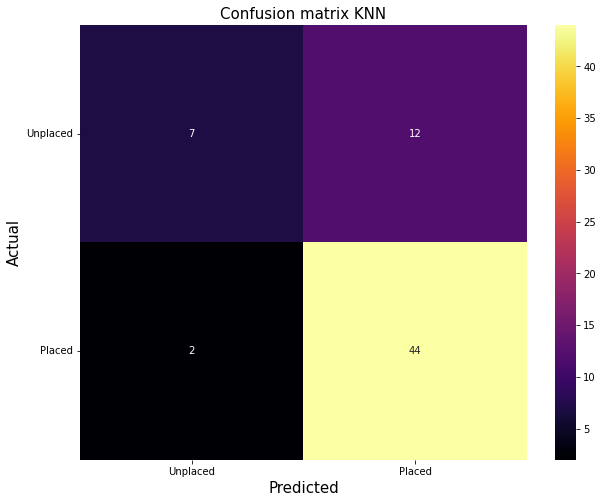

<Figure size 720x576 with 0 Axes>

In [70]:
from sklearn.metrics import confusion_matrix
labels=['Unplaced','Placed']
conf_mat_knn=confusion_matrix(y_test,y_pred_knn)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_knn,ax=ax,annot=True,cmap='inferno')
ax.xaxis.set_ticklabels(['Unplaced', 'Placed'])
ax.yaxis.set_ticklabels(['Unplaced', 'Placed'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix KNN',size=15)
plt.figure(figsize=(10,8))


Hence, using KNN algorithm with K=8, we could successfully predict 77% of the test cases correctly. As the data is quite unbalanced with low unplaced numbers, hence, the training wasn't upto the mark to be able to predict majority of the unplaced test cases correctly.

### Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


Let us utilise the simple linear classification algorithm of logistic regression.

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
reg_log=LogisticRegression()

In [73]:
reg_log.fit(X_train,y_train)

LogisticRegression()

In [74]:
reg_log.score(X_train,y_train)

0.8533333333333334

In [75]:
y_pred_log=reg_log.predict(X_test)
reg_log.score(X_test,y_test)

0.7692307692307693

<Figure size 720x576 with 0 Axes>

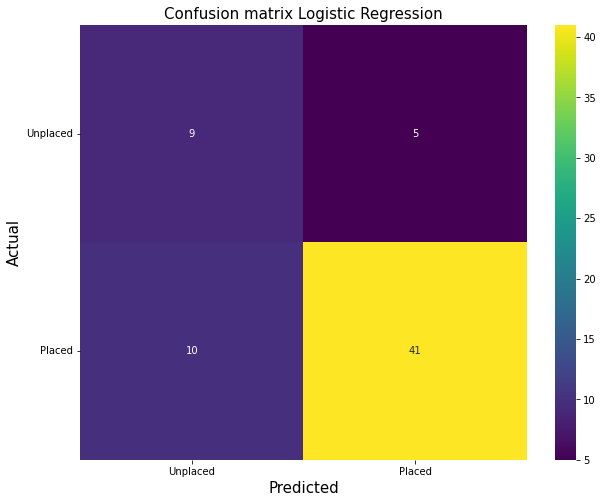

<Figure size 720x576 with 0 Axes>

In [76]:
conf_mat_log=confusion_matrix(y_pred_log,y_test)
labels=['Unplaced','Placed']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_log,ax=ax,annot=True,cmap='viridis')
ax.xaxis.set_ticklabels(['Unplaced', 'Placed'])
ax.yaxis.set_ticklabels(['Unplaced', 'Placed'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix Logistic Regression',size=15)
plt.figure(figsize=(10,8))

In [77]:
y_lr=reg_log.fit(X_train,y_train).decision_function(X_test)

Text(0, 0.5, 'True positive rate')

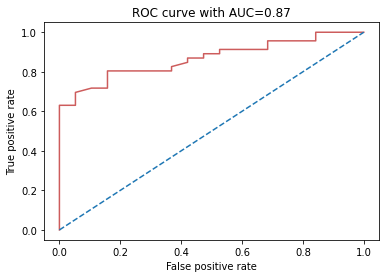

In [78]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve

fpr,tpr,_=roc_curve(y_test,y_lr)
plt.plot(fpr,tpr,color='indianred')
plt.plot([0,1],[0,1],linestyle='--')
auc_reg=auc(fpr,tpr).round(2)
plt.title('ROC curve with AUC={}'.format(auc_reg))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

The AUC score is 0.87 which is decent. Moreover, from the red curve of ROC, it is seen that major regions of the area have been covered which is ideal. Hence, Logistic Regression has done equally well. 

Let us now check the optimum tradeoff between precision and recall values.

Text(0, 0.5, 'Recall')

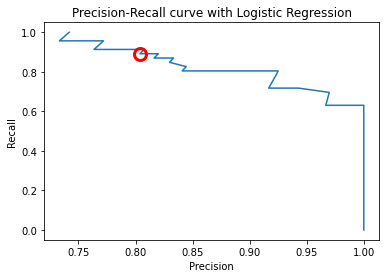

In [79]:
precision,recall,threshold=precision_recall_curve(y_test,y_lr)
closest_zero=np.argmin(np.abs(threshold))
closest_zero_p=precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.plot(precision,recall)
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.title('Precision-Recall curve with Logistic Regression')
plt.xlabel('Precision')
plt.ylabel('Recall')

Optimum  tradeoff is : Precision: 0.8   Recall: 0.9

### Support Vector Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

Let us check how the SVC performs on the given dataset.

In [80]:
from sklearn.svm import SVC

In [81]:
svc=SVC(gamma=1e-07,C=1e9)

In [82]:
svc.fit(X_train,y_train)

SVC(C=1000000000.0, gamma=1e-07)

In [83]:
svc.score(X_train,y_train)

0.88

In [84]:
y_pred_svc=svc.predict(X_test)
svc.score(X_test,y_test)

0.7692307692307693

<Figure size 720x576 with 0 Axes>

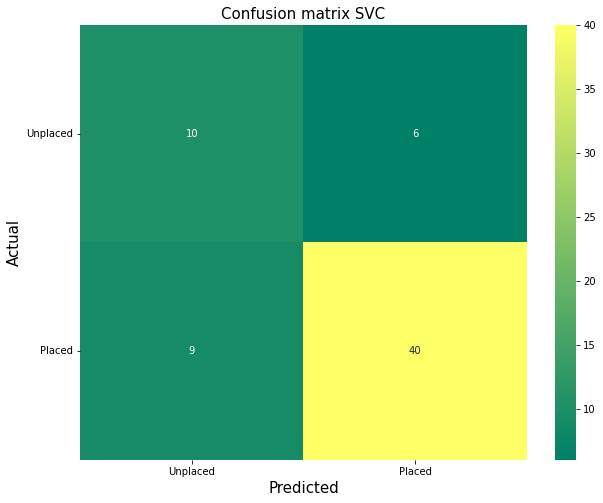

<Figure size 720x576 with 0 Axes>

In [85]:
conf_mat_svc=confusion_matrix(y_pred_svc,y_test)
labels=['Unplaced','Placed']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_svc,ax=ax,annot=True,cmap='summer')
ax.xaxis.set_ticklabels(['Unplaced', 'Placed'])
ax.yaxis.set_ticklabels(['Unplaced', 'Placed'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix SVC',size=15)
plt.figure(figsize=(10,8))

In [86]:
y_svc=svc.fit(X_train,y_train).decision_function(X_test)

Text(0, 0.5, 'True positive rate')

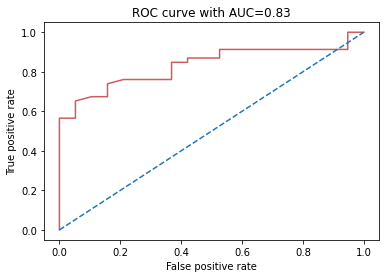

In [87]:
fpr,tpr,_=roc_curve(y_test,y_svc)
plt.plot(fpr,tpr,color='indianred')
plt.plot([0,1],[0,1],linestyle='--')
auc_reg=auc(fpr,tpr).round(2)
plt.title('ROC curve with AUC={}'.format(auc_reg))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUC score is comparitively lower than Logistic Regression. However, the score is quite decent with 0.83 and covers a good amount of area through the red ROC curve.

Let us now check the tradeoff between Precision and Recall.

Text(0, 0.5, 'Recall')

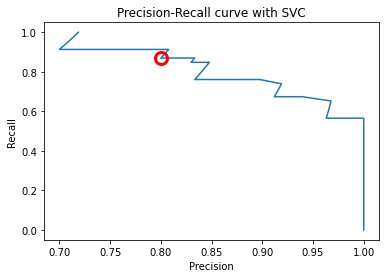

In [88]:
precision,recall,threshold=precision_recall_curve(y_test,y_svc)
closest_zero=np.argmin(np.abs(threshold))
closest_zero_p=precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.plot(precision,recall)
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.title('Precision-Recall curve with SVC')
plt.xlabel('Precision')
plt.ylabel('Recall')

### Random Forest Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Let us now explore the tree based algorithms which are generally known to perform well. However, care needs to be taken to prevent overfitting since tree based models are inherently overfitted. We shall apply grid search CV technique that will allow us tune the depth hyperparameter.

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[5,7,9,10], 'max_depth':[5,7,9,10]}

In [90]:
rfc=RandomForestClassifier()
grid_search=GridSearchCV(rfc,param_grid,scoring='roc_auc')

In [91]:
grid_result=grid_search.fit(X_train,y_train)

In [92]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [93]:
grid_result.best_score_

0.8692513227513228

In [94]:
y_pred_rfc=grid_result.predict(X_test)
grid_result.score(X_test,y_test)

0.8352402745995424

<Figure size 720x576 with 0 Axes>

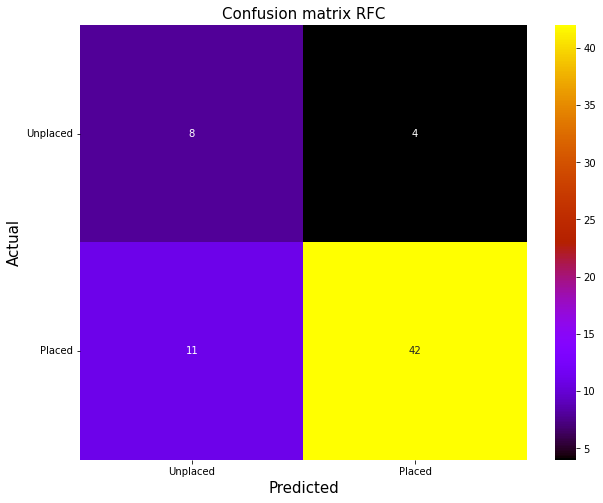

<Figure size 720x576 with 0 Axes>

In [95]:
conf_mat_rfc=confusion_matrix(y_pred_rfc,y_test)
labels=['Unplaced','Placed']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_rfc,ax=ax,annot=True,cmap='gnuplot')
ax.xaxis.set_ticklabels(['Unplaced', 'Placed'])
ax.yaxis.set_ticklabels(['Unplaced', 'Placed'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix RFC',size=15)
plt.figure(figsize=(10,8))

### XGBoost classifier
XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.

Let us try an even more powerful algorithm called the XGBoost classifier which takes gradient boosting to extreme levels.

In [100]:
# !pip install xgboost
from xgboost import XGBClassifier

In [101]:
xgb=XGBClassifier()

In [102]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [103]:
xgb.score(X_train,y_train)

0.9533333333333334

In [104]:
y_pred_xgb=xgb.predict(X_test)
xgb.score(X_test,y_test)

0.7692307692307693

<Figure size 720x576 with 0 Axes>

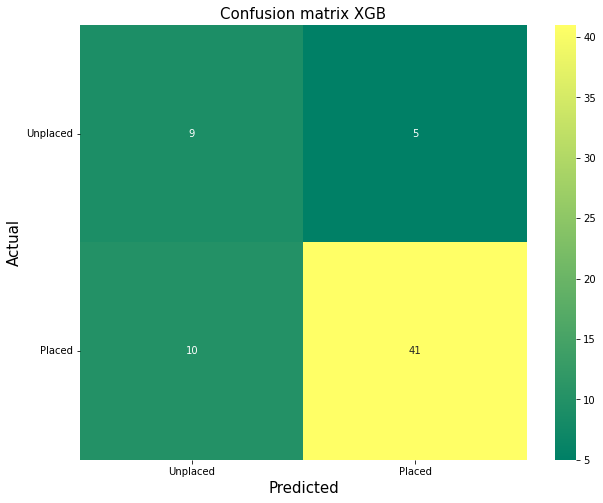

<Figure size 720x576 with 0 Axes>

In [105]:
conf_mat_xgb=confusion_matrix(y_pred_xgb,y_test)
labels=['Unplaced','Placed']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_xgb,ax=ax,annot=True,cmap='summer')
ax.xaxis.set_ticklabels(['Unplaced', 'Placed'])
ax.yaxis.set_ticklabels(['Unplaced', 'Placed'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix XGB',size=15)
plt.figure(figsize=(10,8))

---------------------------------------------
### Model Comparison
We have deployed five machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|KNN Classifier|0.77|
|Logistic Regression|0.77|
|Random Forest Classifier|0.78|
|Support Vector Machine Classifier|0.77|
|XgBoost Classifier|0.79|

**Comparing all those scores scored by the machine learning algorithms, it is clear that XgBoosting Classifier is having the upper hand in case of this dataset and after this, we can use Random Forest Classifier, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. XgBoost Classifier
2. Random Forest Classifier
3. KNN Classifier
4. Logistic Regression
5. Support Vector Machine Classifier

*************************************

### Conclusion
1. As it can be seen, **high percentage of male candidates got placed**. On the other hand, comparitively lower number of female candidates got placed. This is expected as male candidates are generally higher in most brances. Hence, their chances of getting placed is normally higher as well. Let us check the male to female ratio of this branch.

2. The M/F ratio is approximately 2. This can be interpreted as for every 1 female candiate, there are 2 male candiates sitting for placements. **Males outperformed the female candidates in the batch.**

3. All students scoring 80-100% in 10th grade got placed. **Most students in 60-80% range did get placed** while maximum students below 60% **in 10th standard** couldn't get placed. It shows that generally, a student who has done well in 10th grade is more likely to get placed.

4. Almost entire students with 80-100 % got placed. **Most students in 60-80 % range also got placed**. Just like in the case of 10th boards, most students could not get placed in the 0-60 % range.

5. Upon studying the MBA percentage data, we can see that more students from percentage class 2 got placed as opposed to class 3. However, the difference is not as high as for board and UG percentages. Hence, we can say that MBA percentage is not as big as a factor. This could be because MBA is a branch that places much more importance on speaking skills, internships, case studies, etc rather than academic scores. Hence, the play is much more level fielded in this case.

6. **Maximum students enrolled in the program were either from commerce or science background. Very few students were from Arts background.**

7. For 10th Board, the placement ratio for each of the boards is similar. Hence, **we could say that 10th board of examination doesn't hold much value towards placement.**

8. Unlike the case for 10th board, more students opted for state boards in their 12th examinations. The performance of state board students was better as more students from state board of 12th were placed. However, the placed/unplaced ratio for both is nearly identical once again. Hence, **12th board is not playing a significant role once again.**

9. **Majority of the packages will be in the region of 2-4 LPA.**

10. For the prediction model, the best fitted algorithm is **XgBoost Classifier Algorithm** with an accuracy score of 0.79.


### Hope this project will help you! Thank you!

